In [406]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import cmath
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
import pylab as P


label_size = 18
ticks_size = 14
legend_size = 18

%matplotlib inline

In [90]:
# units in meV
N=50
N_g = np.linspace(0.45,0.495,N)
n_g = np.linspace(0.505,0.55,N)

h = 0.0
E_c = 0.100 #charging energy of MBS island
eps_c = 0.100 #charging energy of the dot
h=0 # confinement energy of the dot
t1 =  0.1*E_c
t2 =  1j*t1+0.2*E_c
n_f = 1  #gs config
N_s = 0 #gs config

#p=+1
#N_g, n_g variables

In [352]:

def E_island(N_s, N_g, E_c):
    return E_c*(N_s-N_g)**2
def E_dot(n_f, n_g, eps_c, h):
    return h*n_f + eps_c*(n_f-n_g)**2
def E_tot(N_s, N_g, E_c, n_f, n_g, eps_c, h):
    return E_island(N_s, N_g, E_c)+E_dot(n_f, n_g, eps_c, h)
#in case of n_f = 1, N_s =0, so n_g needs to be close to 0.6 and N_s close to 0.4
def correction(t1, t2, p, N_s, N_g, E_c, n_f, n_g, eps_c, h):
    c=((np.abs(t1))**2 + (np.abs(t2))**2 + 1.j*p*(np.conjugate(t1)*t2-t1*np.conjugate(t2)))/(4*(E_c*(1.-2*N_g)+eps_c*(2*n_g-1.)-h))
    return c
def energy_perturbed(t1, t2, p, N_s, N_g, E_c, n_f, n_g, eps_c, h):
    energy_pert = E_tot(N_s, N_g, E_c, n_f, n_g, eps_c, h)-np.real(correction(t1, t2, p, N_s, N_g, E_c, n_f, n_g, eps_c, h))
    return energy_pert    
def difference_corrections(t1, t2, E_c, N_g, eps_c, h, n_g):
    diff = (np.real(t1)*np.imag(t2)-np.imag(t1)*np.real(t2))/(E_c*(1.-2*N_g)+eps_c*(2*n_g-1.)-h)
    return diff
def charge_expectation(detuning, t1, t2, p):
    charge_exp = 0.5*(1. + detuning/(np.sqrt(detuning**2+(np.abs(t1)-np.abs(t2)*p)**2)))
    return charge_exp
def deriv_gs(t1, t2, E_c, eps_c, h, N_g, n_g, p):
    deriv = 1.0 - ((np.abs(t1))**2 + (np.abs(t2))**2 + 1.j*p*(np.conjugate(t1)*t2-t1*np.conjugate(t2)))/(4.*(E_c*(1.-2*N_g)+eps_c*(2*n_g-1.)-h))
    return deriv 
def phase(omega, omega_0, Q):
    ph = -3.1415-2.*np.arctan(2.0*Q*(omega-omega_0)/omega_0)
    return ph
def phase_shift(quantum_capacitance, Q, total_C, C_c):
    phase_shift = -2.*np.arctan(Q*quantum_capacitance/(total_C + C_c))
    return phase_shift
def phase_shift1(quantum_capacitance, Q, total_C):
    phase_shift = Q * quantum_capacitance/ (total_C-quantum_capacitance)
    return phase_shift
def energy_double_dot(detuning, t1, t2, p):
    gs, ex = -np.sqrt(detuning**2+(np.abs(t1)-np.abs(t2)*p)**2), np.sqrt(detuning**2+(np.abs(t1)-np.abs(t2)*p)**2)
    return gs, ex
def resonance(f, A, Q, f_r):
    S = A/(1. + 2*1j*Q*((f-f_r)/f))
    return np.abs(S), np.angle(S, deg = True)
    









# Energy of the MBS island

In [374]:

#parabolas of island
N_s = 0
plt.xlabel ( ' $ N_g $ ', fontsize = 20)
plt.ylabel ( ' $ E_{MBS} $ ', fontsize = 20)
plt.plot(N_g, E_island(N_s, N_g, E_c) , color = 'r', linewidth = 3)
N_s = 1
plt.plot(N_g, E_island(N_s, N_g, E_c), color = 'r' , linewidth = 3)
plt.close()

# Energy of the dot

In [375]:
#parabolas of the dot
plt.xlabel ( ' $ n_g $ ', fontsize = 20)
plt.ylabel ( ' $ E_{dot}  $ ', fontsize = 20)
n_f = 0
plt.plot(n_g, E_dot(n_f, n_g, eps_c, h) , color = 'b', linewidth = 3 )
n_f = 1
plt.plot(n_g, E_dot(n_f, n_g, eps_c, h), color = 'b' , linewidth = 3)
plt.close()

# Total energy without interaction with N_s = 0, n_f =1

In [2]:

X, Y = np.meshgrid(N_g, n_g)
z = E_tot(N_s, X, E_c, n_f, Y, eps_c, h)
Z = z.reshape(N, N)

plt.pcolor(X, Y, Z, cmap='RdBu')
plt.axis([N_g.min(), N_g.max(), n_g.min(), n_g.max()])
plt.xlabel(' $ N_g $ ', fontsize = 20)
plt.ylabel(' $ n_g $ ', fontsize = 20)
#plt.imshow(z,interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)
plt.close()




NameError: name 'np' is not defined

In [369]:
#linecut at 
n_g = 0.55
z = E_tot(N_s, N_g, E_c, n_f, n_g , eps_c, h)
plt.plot(N_g, z, label =' $n_g = 0.55 $')
n_g = 0.51
z = E_tot(N_s, N_g, E_c, n_f, n_g , eps_c, h)
plt.plot(N_g, z, label =' $n_g = 0.51$')
plt.ylim(0,0.2)
plt.xlabel('$N_g$', fontsize = 20)
plt.legend(fontsize = 20)
plt.close()

# Correction due to tunneling via MBS

<matplotlib.colorbar.Colorbar instance at 0x15A37C60>

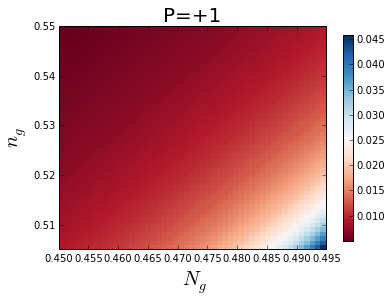

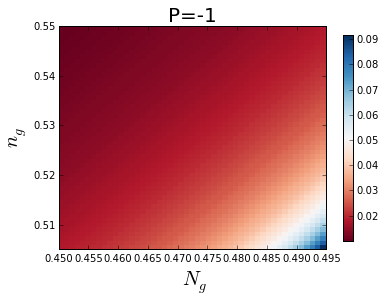

In [92]:
#in case of n_f = 1, N_s =0, so n_g needs to be close to 0.6 and N_s close to 0.4
#assuming ground state with n_f=1 and N_s = 0 



p=+1
X, Y = np.meshgrid(N_g, n_g)
c = np.real(correction(t1, t2, p, N_s, X, E_c, n_f, Y, eps_c, h))
C = c.reshape(N, N)

plt.figure()
plt.title('P=+1', fontsize = 20)
plt.pcolor(X, Y, C, cmap='RdBu')
plt.axis([N_g.min(), N_g.max(), n_g.min(), n_g.max()])
plt.xlabel(' $ N_g $ ', fontsize = 20)
plt.ylabel(' $ n_g $ ', fontsize = 20)
plt.colorbar(shrink=.92)


p=-1
X, Y = np.meshgrid(N_g, n_g)
c = np.real(correction(t1, t2, p, N_s, X, E_c, n_f, Y, eps_c, h))
C = c.reshape(N, N)

plt.figure()
plt.title('P=-1', fontsize = 20)
plt.pcolor(X, Y, C, cmap='RdBu')
plt.axis([N_g.min(), N_g.max(), n_g.min(), n_g.max()])
plt.xlabel(' $ N_g $ ', fontsize = 20)
plt.ylabel(' $ n_g $ ', fontsize = 20)
plt.colorbar(shrink=.92)



# Total energy with correction

<matplotlib.colorbar.Colorbar instance at 0x15BE77B0>

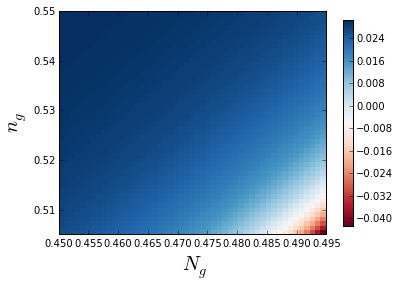

In [93]:
X, Y = np.meshgrid(N_g, n_g)
c = energy_perturbed(t1, t2, p, N_s, X, E_c, n_f, Y, eps_c, h)
C = c.reshape(N, N)

plt.pcolor(X, Y, C, cmap='RdBu')
plt.axis([N_g.min(), N_g.max(), n_g.min(), n_g.max()])
plt.xlabel(' $ N_g $ ', fontsize = 20)
plt.ylabel(' $ n_g $ ', fontsize = 20)
plt.colorbar(shrink=.92)

# deruvative of the total energy

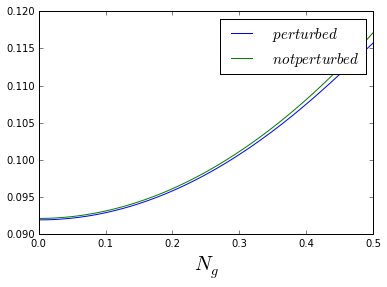

In [280]:

#perturbation of the island
N_g = np.linspace(0.0, 0.5, N)

#perturbed
n_g = 0.52
c = energy_perturbed(t1, t2, p, N_s, N_g, E_c, n_f, n_g, eps_c, h)
plt.plot(N_g, c, label =' $ perturbed $')

#not perturbed
n_g = 0.52
z = E_tot(N_s, N_g, E_c, n_f, n_g , eps_c, h)
plt.plot(N_g, z, label =' $ not perturbed $')

#plt.ylim(0,0.1)
plt.xlabel('$N_g$', fontsize = 20)
plt.legend(fontsize = 15)



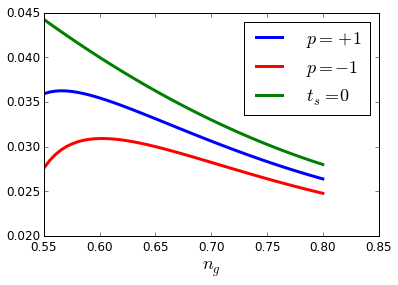

In [127]:
#perturbation of the dot

n_g = np.linspace(0.55, 0.8, N)
h=0.0
N_g1=0.49


#perturbed
p=+1

c = energy_perturbed(t1, t2, p, N_s, N_g1, E_c, n_f, n_g, eps_c, h)
plt.plot(n_g, c, label =' $  p = + 1 $', linewidth = 3, color = 'b')

#perturbed
p=-1

d = energy_perturbed(t1, t2, p, N_s, N_g1, E_c, n_f, n_g, eps_c, h)
plt.plot(n_g, d, label =' $  p = - 1 $', linewidth = 3, color = 'r')


#not perturbed

z = E_tot(N_s, N_g1, E_c, n_f, n_g , eps_c, h)
plt.plot(n_g, z, label =' $  t_s=0 $', linewidth = 3, color = 'g')

#plt.ylim(0,0.1)
plt.xlabel('$n_g$', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(fontsize = legend_size)

plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\parity_dependence.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\parity_dependence.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)



# Difference between the two parities

[[ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]
 [ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]
 [ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]
 ..., 
 [ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]
 [ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]
 [ 0.45        0.45091837  0.45183673 ...,  0.49316327  0.49408163  0.495     ]]


<matplotlib.colorbar.Colorbar instance at 0x1452A918>

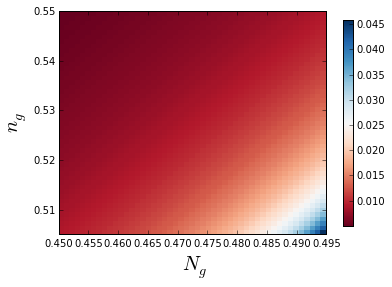

In [26]:
#t1 =  0.20*E_c
#t2 =  1.j*t1
N=50
N_g = np.linspace(0.45,0.495,N)
n_g = np.linspace(0.505,0.55,N)


t1 =  0.1*E_c
t2 =  1j*t1+0.2*E_c

X, Y = np.meshgrid(N_g, n_g)

z = difference_corrections(t1, t2, E_c, X, eps_c, h, Y)
Z = z.reshape(N, N)
plt.pcolor(X, Y, Z, cmap='RdBu')
plt.axis([N_g.min(), N_g.max(), n_g.min(), n_g.max()])
plt.xlabel(' $ N_g $ ', fontsize = 20)
plt.ylabel(' $ n_g $ ', fontsize = 20)
#plt.imshow(z,interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)


# Spectrum of the double dot

In [574]:
h = 0.0
E_c = 0.020 #charging energy of MBS island
eps_c = 0.400 #charging energy of the dot
h=0 # confinement energy of the dot
t1 =  0.2*E_c
t2 =  1.5j*t1
n_f = 1  #gs config
N_s = 0 #gs config

#p=+1
#N_g, n_g variables

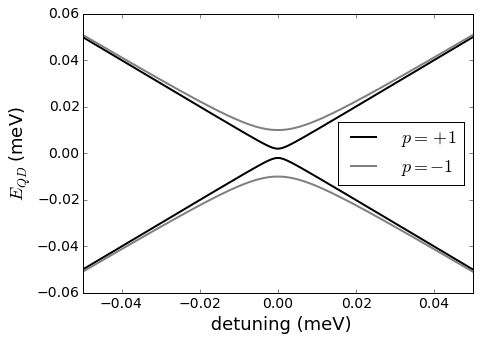

In [575]:
plt.figure(figsize=(7,5))
detuning = np.linspace(-0.05, 0.05, 10000)
p = +1
gs, ex = energy_double_dot(detuning, t1, t2, p)
p = -1
gs1, ex1 = energy_double_dot(detuning, t1, t2, p)
plt.plot(detuning, gs,  linewidth = 2, color = 'black')
plt.plot(detuning, ex, label =' $  p = +1 $', linewidth = 2, color = 'black',  ls = '-')
plt.plot(detuning, gs1,  linewidth = 2, color = 'gray')
plt.plot(detuning, ex1, label =' $ p = -1 $', linewidth = 2, color = 'gray',  ls = '-')
plt.xlim(detuning.min(), detuning.max())
plt.xlabel(' detuning (meV)  ', fontsize = label_size)
plt.ylabel('$ E_{QD} $ (meV)', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(loc='best', fontsize = legend_size)

plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\energy_spectrum.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\energy_spectrum.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)

# Gap between the gs and ex state of the double quantum dot

min gap for p = 1 is 0.9672030231
min gap for p = -1 is 4.83600060462


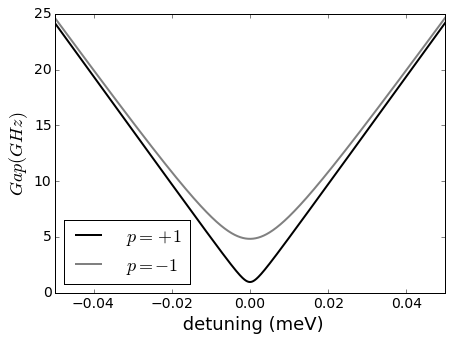

In [576]:
#in GHz 1 mv = 241.8 GHz
gap = (ex - gs)*241.8
gap1 = (ex1 -gs1)*241.8


print 'min gap for p = 1 is', gap.min()
print 'min gap for p = -1 is', gap1.min()
plt.figure(figsize=(7,5))
plt.plot(detuning, gap, label =' $  p = +1 $', linewidth = 2, color = 'black')
plt.plot(detuning, gap1, label =' $   p = -1 $', linewidth = 2, color = 'gray')


plt.xlabel(' detuning (meV) ', fontsize = label_size)
plt.ylabel('$ Gap (GHz) $', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(loc='best', fontsize = legend_size)
plt.xlim(detuning.min(), detuning.max())
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\gap.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\gap.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)


# Charge expectation value 

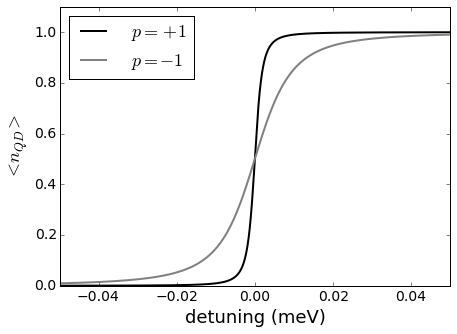

In [577]:
p = +1
charge_exp_1 = charge_expectation(detuning, t1, t2, p)
p = -1
charge_exp_2 = charge_expectation(detuning, t1, t2, p)

plt.figure(figsize=(7,5))
plt.plot(detuning, charge_exp_1, label =' $  p = +1 $', linewidth = 2, color = 'black')
plt.plot(detuning, charge_exp_2, label =' $  p = -1 $', linewidth = 2, color = 'grey')
plt.xlabel('detuning (meV) ', fontsize = label_size)
plt.ylabel('$ <n_{QD}> $', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(loc='best', fontsize = legend_size)
plt.ylim(0,1.1)
plt.xlim(detuning.min(), detuning.max())

plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\charge_expectation.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\charge_expectation.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)



# Quantum capacitance

3.24405e-14 6.4881e-15


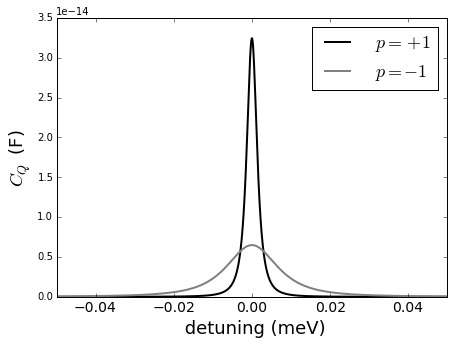

In [608]:
#C_max = 0.5*e^2/(t1-t2*p)
e = 1.602*1e-19
h = 6.623*1e-34
#here I define 'a' as C_g/C_QD
a = 0.9
C_qmax1 = np.abs(e/(2*(np.abs(t1*1e-3)-np.abs(t2*1e-3)))*a**2) #Farad
C_qmax2 = np.abs(e/(2*(np.abs(t1*1e-3)+np.abs(t2*1e-3)))*a**2) #Farad
print C_qmax1, C_qmax2

#here the capacitance has not the proper unity
qc_1 = np.gradient(charge_exp_1)
qc_2 = np.gradient(charge_exp_2)

#rescaling in Farad
qc_1 = qc_1*C_qmax1/max(qc_1)
qc_2 = qc_2*C_qmax2/max(qc_2)

plt.figure(figsize=(7,5))
plt.plot(detuning, qc_1, label =' $  p = +1 $', linewidth = 2, color = 'black')
plt.plot(detuning, qc_2, label =' $  p = -1 $', linewidth = 2, color = 'grey')
plt.xlabel(' detuning (meV) ', fontsize = label_size)
plt.ylabel('$  C_Q $ (F) ', fontsize = label_size)
plt.xticks( fontsize = ticks_size)
#plt.yticks([])
plt.legend(loc='best', fontsize = legend_size)
plt.xlim(detuning.min(), detuning.max())
#plt.ylim(0, 0.06)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\quantum_capacitance.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\quantum_capacitance.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)






# At detuning 10 uV

In [584]:
qc_1_protected =  np.abs(qc_1)[4000]
qc_2_protected =  np.abs(qc_2)[4000]

print qc_1_protected
print qc_2_protected

1.93568204528e-16
1.8135462775e-15


# Resonance

fr= 410.948415959
f_r1= 410.815902503
f_r2= 409.711896075
30.1168319589


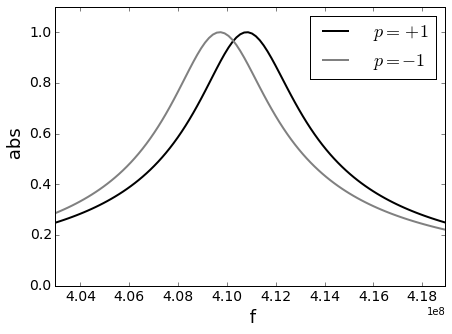

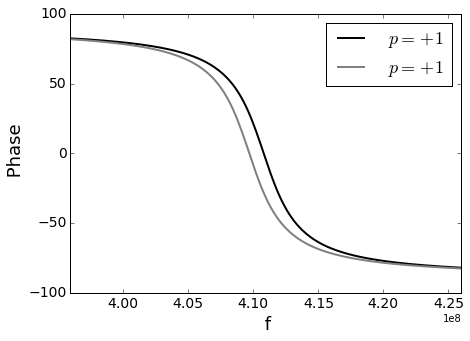

In [585]:

L = 500*1e-9
Cp = 0.3*1e-12
#Cq_1 = 65*1e-15
#Cq_2 = 13*1e-15
C_q1 = qc_1_protected
C_q2 = qc_2_protected


f_r = 1./(2*3.1415*np.sqrt(L*Cp))
f_r1 = 1./(2*3.1415*np.sqrt(L*(Cp+qc_1_protected)))
f_r2 = 1./(2*3.1415*np.sqrt(L*(Cp+qc_2_protected)))

f = np.linspace(f_r-80e6, f_r+80e6, 1000)
A = 1
Q = 100
r, phase = resonance(f, A, Q, f_r)
r1, phase1 = resonance(f, A, Q, f_r1)
r2, phase2 = resonance(f, A, Q, f_r2)

print 'fr=',f_r/1e6
print 'f_r1=', f_r1/1e6
print 'f_r2=', f_r2/1e6

plt.figure(figsize=(7,5))
#plt.plot(f, t,  linewidth = 2, color = 'black')
plt.plot(f, r1,  linewidth = 2, label =' $  p = +1 $', color = 'black')
plt.plot(f, r2,  linewidth = 2, label =' $  p = -1 $', color = 'grey')
plt.xlabel(' f ', fontsize = label_size)
plt.ylabel(' abs', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(loc='best', fontsize = legend_size)
plt.xlim(f_r-8e6, f_r+8e6)
plt.ylim(0, 1.1)


plt.figure(figsize=(7,5))
#plt.plot(f, phase,  linewidth = 2, color = 'black')
plt.plot(f, phase1,  linewidth = 2, label =' $  p = +1 $', color = 'black')
plt.plot(f, phase2,  linewidth = 2, label =' $  p = +1 $', color = 'grey')
plt.xlabel(' f ', fontsize = label_size)
plt.ylabel(' Phase', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)
plt.legend(loc='best', fontsize = legend_size)
plt.xlim(f_r-15e6, f_r+15e6)

plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\\resonator1.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\\resonator1.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)



print (phase1 - phase2).max()





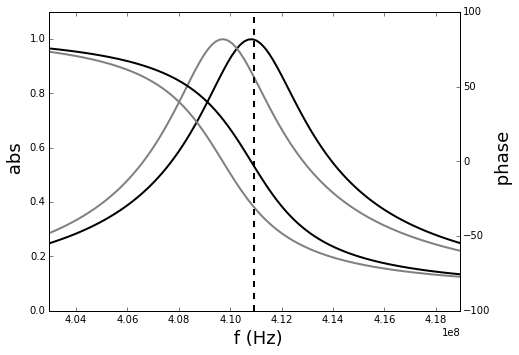

30.1168319589


In [665]:
fig, ax1 = plt.subplots(figsize = (7.3,5))



ax1.plot(f, r1,  linewidth = 2, label =' $  p = +1 $', color = 'black')
ax1.plot(f, r2,  linewidth = 2, label =' $  p = -1 $', color = 'grey')
ax1.set_xlabel(' f (Hz)', fontsize = label_size)
ax1.set_ylabel(' abs', fontsize = label_size)
ax1.set_xlim(f_r-8e6, f_r+8e6)
ax1.set_ylim(0, 1.1)
ax1.tick_params( 'r', fontsize = ticks_size)



# fc='k', ec='k'
ax2 = ax1.twinx()


ax2.plot(f, phase1,  linewidth = 2, label =' $  p = +1 $', color = 'black')
ax2.plot(f, phase2,  linewidth = 2, label =' $  p = -1 $', color = 'grey')
ax2.set_ylabel(' phase', fontsize =  label_size)
ax2.set_xlim(f_r-8e6, f_r+8e6)
ax2.tick_params( 'r', labelsize = ticks_size+4)

ax2.axvline(f_r, color = 'black', linewidth = 2, linestyle = '--')

fig.tight_layout()
plt.show()

fig.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\\resonator.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
fig.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\\resonator.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)

print (phase1 - phase2).max()

# Parabolas

In [659]:
def H_c(N, N_g, E_c, Delta):
    h_c = (E_c*(N-N_g)**2 + Delta)/E_c
    return h_c 

In [660]:
N_g = np.linspace(-3, 3, 1e2)
E_c = 0.05 


N = -2
A = H_c(N, N_g, E_c, Delta = 0)

N = -1
B = H_c(N, N_g, E_c, Delta = 2*E_c)

N = 0
C = H_c(N, N_g, E_c, Delta = 0)

N = +1
D = H_c(N, N_g, E_c, Delta = 2*E_c)

N = 2
E = H_c(N, N_g, E_c, Delta = 0)

N = -1
F = H_c(N, N_g, E_c, Delta = 0.8*E_c)

N = 1
G = H_c(N, N_g, E_c, Delta = 0.8*E_c)

N = -1
H = H_c(N, N_g, E_c, Delta = 0)

N = 1
I = H_c(N, N_g, E_c, Delta = 0)

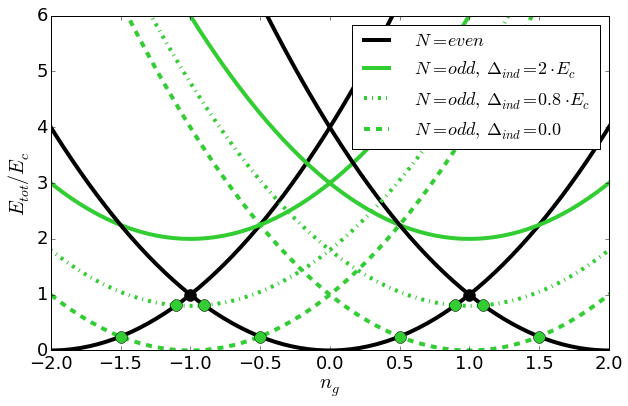

In [663]:
plt.figure(figsize=(10,6))

width_line = 4
size_marker = 12

plt.plot(N_g, A, label =' $  N = even $', linewidth = width_line, color = 'black')
plt.plot(N_g, B, label =' $  N = odd, $ $\Delta_{ind} = 2 \cdot E_c $', linewidth = width_line, color = 'limegreen')
plt.plot(N_g, C, linewidth = width_line, color = 'black')
plt.plot(N_g, D,  linewidth = width_line, color = 'limegreen')
plt.plot(N_g, E, linewidth = width_line , color = 'black')


plt.plot(N_g, F,  label =' $ N = odd,  $ $ \Delta_{ind} =  0.8 \cdot E_c  $ ', linewidth = width_line , color = 'limegreen' ,  linestyle = '-.')
plt.plot(N_g, G,  linewidth = width_line, color = 'limegreen',  linestyle = '-.')

plt.plot(N_g, H,  label =' $ N = odd,  $ $ \Delta_{ind} = 0.0  $  ', linewidth = width_line, color = 'limegreen', linestyle = '--' )
plt.plot(N_g, I,  linewidth = width_line, color = 'limegreen', linestyle = '--')

plt.xlabel('$ n_g $', fontsize = label_size+2)
plt.ylabel('$ E_{tot}/E_c $', fontsize = label_size+2)
plt.xticks(fontsize = ticks_size+4)
plt.yticks(fontsize = ticks_size+4)
plt.legend(loc='best', fontsize = legend_size)
plt.ylim(0,6)
plt.xlim(-2,2)


plt.plot( 1, 1, marker = 'o', markersize = size_marker, color = 'black')
plt.plot( -1, 1, marker = 'o', markersize = size_marker, color = 'black')

plt.plot( 0.9, 0.25 * (1+0.8)**2, marker = 'o', markersize = size_marker, color = 'limegreen')
plt.plot( 1.1, 0.25 * (1+0.8)**2, marker = 'o', markersize = size_marker,color = 'limegreen')

plt.plot( -0.9, 0.25 * (1+0.8)**2, marker = 'o', markersize = size_marker, color = 'limegreen')
plt.plot( -1.1, 0.25 * (1+0.8)**2, marker = 'o', markersize = size_marker, color = 'limegreen')
#plt.plot( -1.5, 1./4, marker = 'o', color = 'limegreen')


plt.plot( -0.5, 1./4, marker = 'o', markersize = size_marker, color = 'limegreen')
plt.plot( -1.5, 1./4, marker = 'o', markersize = size_marker, color = 'limegreen')
plt.plot( 0.5, 1./4, marker = 'o', markersize = size_marker, color = 'limegreen')
plt.plot( 1.5, 1./4, marker = 'o', markersize = size_marker, color = 'limegreen')

plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\parabolas.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\parabolas.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)

# Hydrogen cleaning result

In [641]:
#conductance quantum
G_0 = 2*e**2/h


inputFile = 'C:\\Users\\Francesco\\Documents\\PhD\data\\wires_1471\\H-clean1471_Vbias-vs-B_4-6_1.dat'
data = np.loadtxt(inputFile)
#selecting the data at B = 0
B = 0
data1 = data[data[:,1]==B]
Vbias1 = data1[:,0]/1e3
G1 = data1[:,5]/G_0


B = 0.51
data2 = data[data[:,1]==B]
Vbias2 = data2[:,0]/1e3
G2 = data2[:,5]/G_0

B = 1.2
data3 = data[data[:,1]==B]
Vbias3 = data3[:,0]/1e3
G3 = data3[:,5]/G_0


B = 1.5
data4 = data[data[:,1]==B]
Vbias4 = data4[:,0]/1e3
G4 = data4[:,5]/G_0



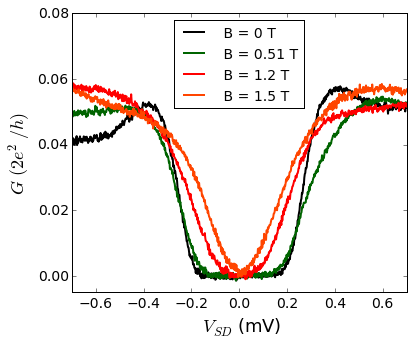

In [657]:
plt.figure(figsize=(6,5))
k = 0.004

plt.plot(Vbias1, G1+k, label =' B = 0 T ', linewidth = 2, color = 'black')
plt.plot(Vbias2, G2+k, label =' B = 0.51 T ', linewidth = 2, color = 'darkgreen')
plt.plot(Vbias3, G3+k, label =' B = 1.2 T ', linewidth = 2, color = 'red')
plt.plot(Vbias4, G4+k, label =' B = 1.5 T ', linewidth = 2, color = 'orangered')

plt.xlabel(' $ V_{SD} $ (mV)', fontsize = label_size)
plt.ylabel('$ G $ $ (2e^2/h) $', fontsize = label_size)
plt.xticks(fontsize = ticks_size)
plt.yticks(fontsize = ticks_size)

plt.yticks([0, 0.02, 0.04, 0.06, 0.08])
plt.legend(loc='best', fontsize = legend_size-4)
plt.xlim(-0.7, 0.7)
plt.ylim(-0.005, 0.08)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\superconductivity.eps', dpi=None, facecolor='w', edgecolor='w',
         format='eps', transparent=False)
plt.savefig('C:\Users\Francesco\Documents\PhD\First year proposal\materials\superconductivity.png', dpi=None, facecolor='w', edgecolor='w',
         format='png', transparent=False)